Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import from tensorflow.keras instead of keras
import numpy as np

import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading Model
model = tf.keras.models.load_model('/content/drive/MyDrive/TomatoeNet_model.keras')

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │      33,555,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,114,106 (393.35 MB)

 Trainable params: 34,371,368 (131.12 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,742,738 (262.23 MB)

In [43]:
#Visualize single image
import cv2
image_path = '/content/drive/MyDrive/tomato_data_a/TEST/yellow leaf curl/ed1d52ff-5971-4c9a-bdde-3de21492f57c___UF.GRC_YLCV_Lab 03230.JPG'

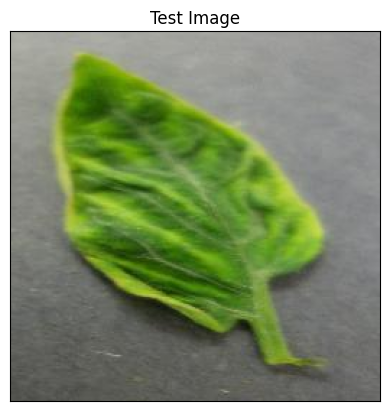

In [44]:
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert BGR image to RGB
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [45]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))#resize image to 128, 128
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image into a batch because images were loaded in batches
print(input_arr.shape)


(1, 128, 128, 3)


In [46]:
#Model shows the probability of belonging to the eight classes
prediction = model.predict(input_arr)
prediction, prediction.shape #to predict image with model


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(array([[3.1582195e-09, 1.4904229e-10, 3.7016405e-09, 6.4180011e-10,
         2.2867126e-09, 2.3553710e-09, 2.5517250e-11, 1.0000000e+00]],
       dtype=float32),
 (1, 8))

In [47]:
result_index = np.argmax(prediction)
result_index

7

Visualizing Test Image with Corresponding Disease Classification Labels from Training Set

In [48]:
class_name = ['bacterial spot',
 'early blight',
 'healthy',
 'late blight',
 'leaf mold',
 'mosaic virus',
 'septoria spot',
 'yellow leaf curl']

In [49]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
print("The image belongs to class: ", model_prediction)

The image belongs to class:  yellow leaf curl


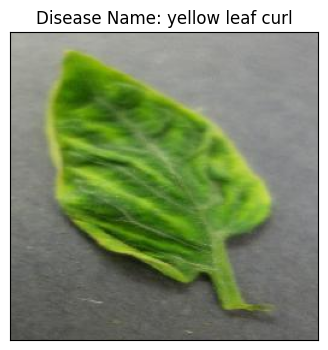

In [50]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.figure(figsize=(4, 4))  # Set the size of the figure (width, height) in inches

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


Testing the model on google downloaded images

In [63]:
#Visualize single image
import cv2
image_path = '/content/drive/MyDrive/google data/mosaic virus.png'

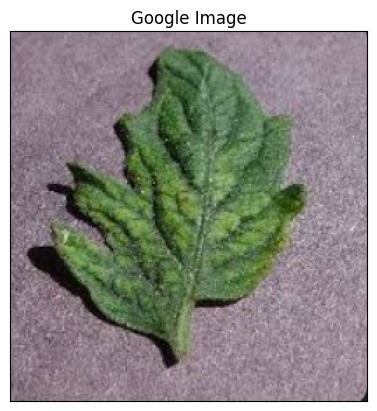

In [64]:
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert BGR image to RGB
plt.imshow(img)
plt.title("Google Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [65]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))#resize image to 128, 128
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #convert single image into a batch because images were loaded in batches
print(input_arr.shape)

(1, 128, 128, 3)


In [66]:
#Model shows the probability of belonging to eight classes
prediction = model.predict(input_arr)
prediction, prediction.shape #to predict image with model


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


(array([[1.1908203e-07, 1.0372453e-05, 2.0080563e-05, 4.3526046e-07,
         2.7140268e-06, 9.9995852e-01, 4.8292127e-06, 2.8893585e-06]],
       dtype=float32),
 (1, 8))

In [67]:
result_index = np.argmax(prediction)
result_index

5

In [68]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
print("The image belongs to class: ", model_prediction)

The image belongs to class:  mosaic virus


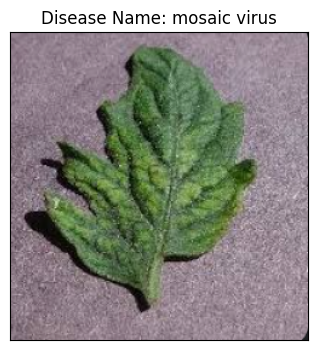

In [69]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.figure(figsize=(4, 4))  # Set the size of the figure (width, height) in inches

plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
